In [1]:
import geopandas as gpd

import rioxarray
import xarray as xr

import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

In [2]:
jann_loc = "/media/muskrat/T7 Shield/eco_data/v3/native/Jann/basic-extract/range_data_default.nc"

df = xr.open_dataset(jann_loc)

In [ ]:
df

In [ ]:
# add first 3 values of df into new dataset

sliced = df.isel(SpeciesID=slice(0, 3))

sliced

In [3]:
species_1 = df["Native region"].sel(SpeciesID=1)

In [ ]:
species_1

In [ ]:
species_1.dims

In [ ]:
species_1.values

In [ ]:
species_1.coords

In [ ]:
species_1.attrs

In [4]:
test = species_1.to_series()

In [5]:
test

latitude    longitude  
 89.749999  -179.750000   NaN
            -179.250000   NaN
            -178.750000   NaN
            -178.250000   NaN
            -177.750000   NaN
                           ..
-89.750000   177.749999   NaN
             178.249999   NaN
             178.749999   NaN
             179.249999   NaN
             179.749999   NaN
Name: Native region, Length: 259200, dtype: float32

In [6]:
# convert multiindex to dataframe

frame = test.to_frame()

In [7]:
# find values where Native regions is 1 in frame

present = frame[frame["Native region"] == 1]

In [8]:
present.reset_index(inplace=True)

In [10]:
# create variable point that only contains latitude and longitude columns from present

point = present[["latitude", "longitude"]]

In [11]:
# convert point latitude and longitude columns to point geometry

point["geometry"] = point.apply(lambda x: Point(x["longitude"], x["latitude"]), axis=1)

point

/home/muskrat/miniconda3/envs/eco/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,latitude,longitude,geometry
0,-0.25,-75.75,POINT (-75.750000419 -0.2500003609999908)
1,-0.25,-75.25,POINT (-75.25000042100001 -0.2500003609999908)
2,-0.25,-74.75,POINT (-74.750000423 -0.2500003609999908)
3,-0.25,-74.25,POINT (-74.25000042500001 -0.2500003609999908)
4,-0.75,-75.25,POINT (-75.25000042100001 -0.7500003589999835)
...,...,...,...
914,-22.25,-62.75,POINT (-62.75000047100001 -22.250000272999984)
915,-22.75,-67.75,POINT (-67.750000451 -22.75000027099999)
916,-22.75,-67.25,POINT (-67.25000045300001 -22.75000027099999)
917,-22.75,-66.75,POINT (-66.750000455 -22.75000027099999)


In [12]:
# convert point to geodataframe

point = gpd.GeoDataFrame(point, geometry="geometry", crs="EPSG:4326")

In [13]:
point

,latitude,longitude,geometry
0,-0.25,-75.75,POINT (-75.75000 -0.25000)
1,-0.25,-75.25,POINT (-75.25000 -0.25000)
2,-0.25,-74.75,POINT (-74.75000 -0.25000)
3,-0.25,-74.25,POINT (-74.25000 -0.25000)
4,-0.75,-75.25,POINT (-75.25000 -0.75000)
...,...,...,...
914,-22.25,-62.75,POINT (-62.75000 -22.25000)
915,-22.75,-67.75,POINT (-67.75000 -22.75000)
916,-22.75,-67.25,POINT (-67.25000 -22.75000)
917,-22.75,-66.75,POINT (-66.75000 -22.75000)


<Axes: >

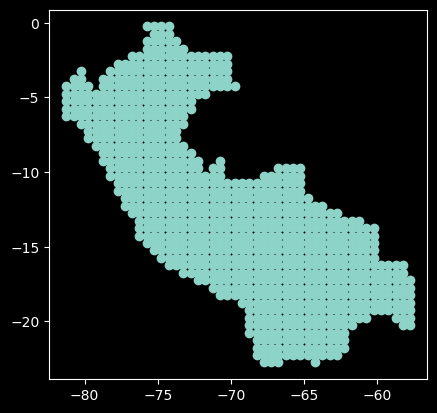

In [14]:
point.plot()

In [15]:
# create variable poly that only contains geometry column from point in order

buffer = point["geometry"].buffer(0.4)

/tmp/ipykernel_27697/1266440864.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer = point["geometry"].buffer(0.4)


<Axes: >

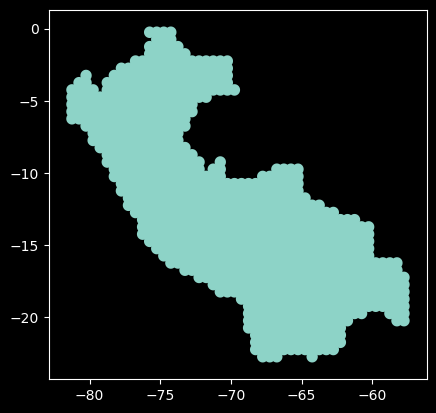

In [16]:
buffer.plot()

In [17]:
union = buffer.unary_union

In [18]:
poly = gpd.GeoDataFrame(geometry=[union])

In [19]:
poly["specis_id"] = 1

poly

,geometry,specis_id
0,"POLYGON ((-77.25000 -12.65000, -77.28921 -12.6...",1


<Axes: >

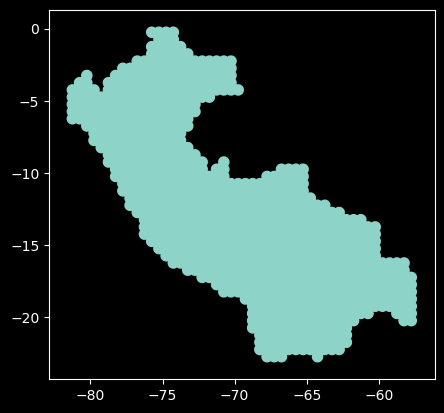

In [20]:
poly.plot()

In [ ]:
# limit y axis to 0 to -50 and x axis to -100 to -50

xmin, ymin, xmax, ymax = (-200, 100, 200, -100)


ax = species_1_pandas.plot()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

In [ ]:
ecomap_loc = "/media/muskrat/T7 Shield/eco_data/ecomap_final/eco_map.geojson"

eco_map = gpd.read_file(ecomap_loc)

In [ ]:
# limit y axis to 0 to -50 and x axis to -100 to -50

xmin, ymin, xmax, ymax = (-90, 30, 0, -50)


ax = eco_map.plot(facecolor="none", edgecolor="white")
pak = species_2_crs.plot(ax=ax, zorder=1)

# # flip map around
# ax.invert_yaxis()
# ax.invert_xaxis()


ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

In [2]:
# load csv using pandas
meta = pd.read_csv(
    "/media/muskrat/T7 Shield/eco_data/v3/native/Jann/basic-extract/metadata_default.csv"
)

In [6]:
meta

,speciesID,scientificname,redlistcategory,rank,family,order,class,subdivision,division,data,...,cutoff.kappa,cutoff.spec.sens,cutoff.no.omission,cutoff.prevalence,cutoff.equal.sens.spec,cutoff.sensitivity,extent.xmin,extent.xmax,extent.ymin,extent.ymax
0,1,Aa calceata,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Occurrence data,...,NaN,NaN,NaN,NaN,NaN,NaN,-81.500000,-57.500000,-23.000000,-3.620000e-07
1,2,Aa mandonii,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-81.500000,-57.500000,-23.000000,-3.620000e-07
2,3,Aa matthewsii,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Maxent prediction,...,0.879796,0.618083,0.130396,0.025598,0.404177,0.162564,-81.500000,-57.500000,-23.000000,-3.620000e-07
3,4,Abarema abbottii,Vulnerable,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Occurrence data,...,NaN,NaN,NaN,NaN,NaN,NaN,-72.500000,-68.000000,17.500000,2.000000e+01
4,5,Abarema adenophora,Least Concern,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Maxent prediction,...,0.917903,0.444638,0.255208,0.014179,0.561189,0.445130,-88.000000,-45.500001,-18.500000,1.550000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47670,47671,Zygophyllum bucharicum,Critically Endangered,SPECIES,Zygophyllaceae,Zygophyllales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,51.999999,75.499999,29.000000,4.600000e+01
47671,47672,Zygophyllum darvasicum,Critically Endangered,SPECIES,Zygophyllaceae,Zygophyllales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,66.999999,75.499999,36.499999,4.150000e+01
47672,47673,Zygophyllum giessii,Least Concern,SPECIES,Zygophyllaceae,Zygophyllales,Magnoliopsida,Spermatophytina,Tracheophyta,Maxent prediction,...,0.990526,0.798903,0.798903,0.022430,0.798903,0.866265,11.499999,20.999999,-29.000000,-1.650000e+01
47673,47674,Zygophyllum kaschgaricum,Data Deficient,SPECIES,Zygophyllaceae,Zygophyllales,Magnoliopsida,Spermatophytina,Tracheophyta,Occurrence data,...,NaN,NaN,NaN,NaN,NaN,NaN,45.999999,119.999999,34.000000,5.550000e+01


In [4]:
# create df from meta that only includes rows where data column = Native region

native = meta[meta["data"] == "Native region"]

In [7]:
native

,speciesID,scientificname,redlistcategory,rank,family,order,class,subdivision,division,data,...,cutoff.kappa,cutoff.spec.sens,cutoff.no.omission,cutoff.prevalence,cutoff.equal.sens.spec,cutoff.sensitivity,extent.xmin,extent.xmax,extent.ymin,extent.ymax
1,2,Aa mandonii,Data Deficient,SPECIES,Orchidaceae,Asparagales,Liliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-81.500000,-57.500000,-23.000000,-3.620000e-07
10,11,Abarema centiflora,Vulnerable,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-70.000000,-57.500000,-23.000000,-9.500000e+00
18,19,Abarema josephi,Near Threatened,SPECIES,Fabaceae,Fabales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-79.500000,-66.500000,-4.500000,1.250000e+01
51,52,Abies fanjingshanensis,Endangered,SPECIES,Pinaceae,Pinales,Pinopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,96.999999,116.499999,21.000000,3.450000e+01
67,68,Abies nebrodensis,Critically Endangered,SPECIES,Pinaceae,Pinales,Pinopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,11.499999,15.999999,36.499999,3.900000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47663,47664,Zygogynum staufferianum,Data Deficient,SPECIES,Winteraceae,Canellales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,129.499999,154.499999,-12.000000,-3.620000e-07
47665,47666,Zygogynum tanyostigma,Endangered,SPECIES,Winteraceae,Canellales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,159.499999,171.499999,-23.000000,-1.900000e+01
47668,47669,Zygophlebia eminens,Endangered,SPECIES,Polypodiaceae,Polypodiales,Polypodiopsida,Polypodiophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,-81.000000,-75.000000,-5.500000,1.500000e+00
47670,47671,Zygophyllum bucharicum,Critically Endangered,SPECIES,Zygophyllaceae,Zygophyllales,Magnoliopsida,Spermatophytina,Tracheophyta,Native region,...,NaN,NaN,NaN,NaN,NaN,NaN,51.999999,75.499999,29.000000,4.600000e+01
